# TD NOTE JAOUDET SACRE

## Analyse des stations Velib en Ile-de-France

# *Première Partie*

Notre étude sera autour de la database des velibs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

In [2]:
velib = pd.read_csv("velib-disponibilite-en-temps-reel.csv", sep=";")
velib

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,31104,Mairie de Rosny-sous-Bois,OUI,30,18,9,4,5,OUI,OUI,2022-10-12T18:28:35+02:00,"48.871256519012,2.4865807592869",Rosny-sous-Bois,NaN
1,16107,Benjamin Godard - Victor Hugo,OUI,35,33,0,0,0,OUI,OUI,2022-10-12T18:23:33+02:00,"48.865983,2.275725",Paris,NaN
2,11104,Charonne - Robert et Sonia Delauney,OUI,20,16,4,1,3,OUI,OUI,2022-10-12T18:26:34+02:00,"48.85590755596891,2.3925706744194035",Paris,NaN
3,9020,Toudouze - Clauzel,OUI,21,14,7,3,4,OUI,OUI,2022-10-12T18:28:09+02:00,"48.87929591733507,2.3373600840568547",Paris,NaN
4,14111,Cassini - Denfert-Rochereau,OUI,25,20,4,0,4,OUI,OUI,2022-10-12T18:28:51+02:00,"48.837525839067,2.3360354080796",Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,34005,Adrien Lesesne - Docteur Bauer,OUI,30,0,25,11,14,OUI,OUI,2022-10-12T18:29:22+02:00,"48.90263867304635,2.348248063431511",Saint-Ouen-sur-Seine,NaN
1437,10026,Gare de l'Est - Chateau Landon,OUI,59,41,14,6,8,OUI,OUI,2022-10-12T18:29:28+02:00,"48.879305,2.362424",Paris,NaN
1438,18023,Ordener - Poissonniers,OUI,35,30,5,1,4,OUI,OUI,2022-10-12T18:28:46+02:00,"48.891213890844654,2.351288666219873",Paris,NaN
1439,18026,Ruisseau - Ordener,OUI,35,15,18,9,9,OUI,OUI,2022-10-12T18:29:51+02:00,"48.89299462568024,2.340144887566567",Paris,NaN


In [3]:
velib = velib.dropna(how='all',axis=1) # on supp les col entierement sans valeur
velib = velib.dropna(how='any',axis=0) # on supp les lignes o$ y'a une case sans valeur
velib = velib.drop(columns=['Coordonnées géographiques','Actualisation de la donnée'], axis=1)
velib

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées
0,31104,Mairie de Rosny-sous-Bois,OUI,30,18,9,4,5,OUI,OUI,Rosny-sous-Bois
1,16107,Benjamin Godard - Victor Hugo,OUI,35,33,0,0,0,OUI,OUI,Paris
2,11104,Charonne - Robert et Sonia Delauney,OUI,20,16,4,1,3,OUI,OUI,Paris
3,9020,Toudouze - Clauzel,OUI,21,14,7,3,4,OUI,OUI,Paris
4,14111,Cassini - Denfert-Rochereau,OUI,25,20,4,0,4,OUI,OUI,Paris
...,...,...,...,...,...,...,...,...,...,...,...
1436,34005,Adrien Lesesne - Docteur Bauer,OUI,30,0,25,11,14,OUI,OUI,Saint-Ouen-sur-Seine
1437,10026,Gare de l'Est - Chateau Landon,OUI,59,41,14,6,8,OUI,OUI,Paris
1438,18023,Ordener - Poissonniers,OUI,35,30,5,1,4,OUI,OUI,Paris
1439,18026,Ruisseau - Ordener,OUI,35,15,18,9,9,OUI,OUI,Paris


Aucune ligne retirée, juste 1 colonne.
Données actualisées le 12/10/2022 vers 18h30

# *DEUXIEME PARTIE*

Affichage des stations en Ile-de-France avec les plus grandes et les plus petites capacités (non nulles)

In [4]:
velib.sort_values(by='Capacité de la station',ascending=False).head()

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées
810,15030,Emeriau - Beaugrenelle,OUI,74,25,48,45,3,OUI,OUI,Paris
376,15028,Grenelle - Dr Finlay,OUI,71,32,38,37,1,OUI,OUI,Paris
743,5034,Censier - Santeuil,OUI,69,43,24,24,0,OUI,OUI,Paris
1235,16025,Jean de la Fontaine - Boulainvilliers,OUI,68,62,3,2,1,OUI,OUI,Paris
1107,12157,Fabre d'Eglantine - Place de la Nation,OUI,68,66,2,2,0,OUI,OUI,Paris


In [5]:
velib[velib['Capacité de la station']>0].sort_values(by='Capacité de la station',ascending=True).head()

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées
509,35017,Toffier Decaux - Cartier Bresson,OUI,7,0,7,2,5,OUI,OUI,Pantin
773,15043,Brancion - Lefebvre,OUI,11,1,9,1,8,OUI,OUI,Paris
134,15067,Desaix - Edgar Faure,OUI,12,7,5,5,0,OUI,OUI,Paris
1033,20006,Pyrénées - Plaine,OUI,12,7,5,3,2,OUI,OUI,Paris
992,18004,Place des Abbesses,OUI,12,9,2,0,2,OUI,OUI,Paris


<AxesSubplot:>

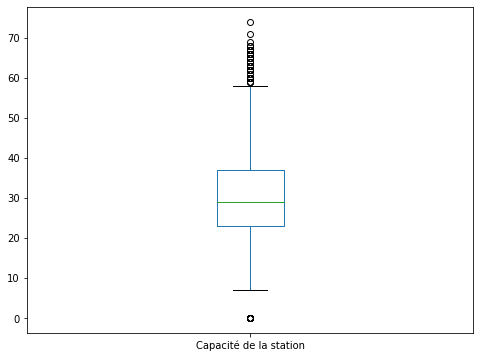

In [6]:
velib['Capacité de la station'].plot(kind='box',figsize=(8,6))

On peut voir que trois quarts des stations ont une capacité de vélos comprise entre 22 et 36 vélos, avec une valeur médiane de 29 vélos. On voit de plus qu'il y a u grand nombre de stations avec des valeurs très éléves, signe que certaines stations sont bien plus importantes que les autres.

## Analyse par ville

<AxesSubplot:title={'center':'Nombre de stations Vélib par ville'}, xlabel='Nom communes équipées'>

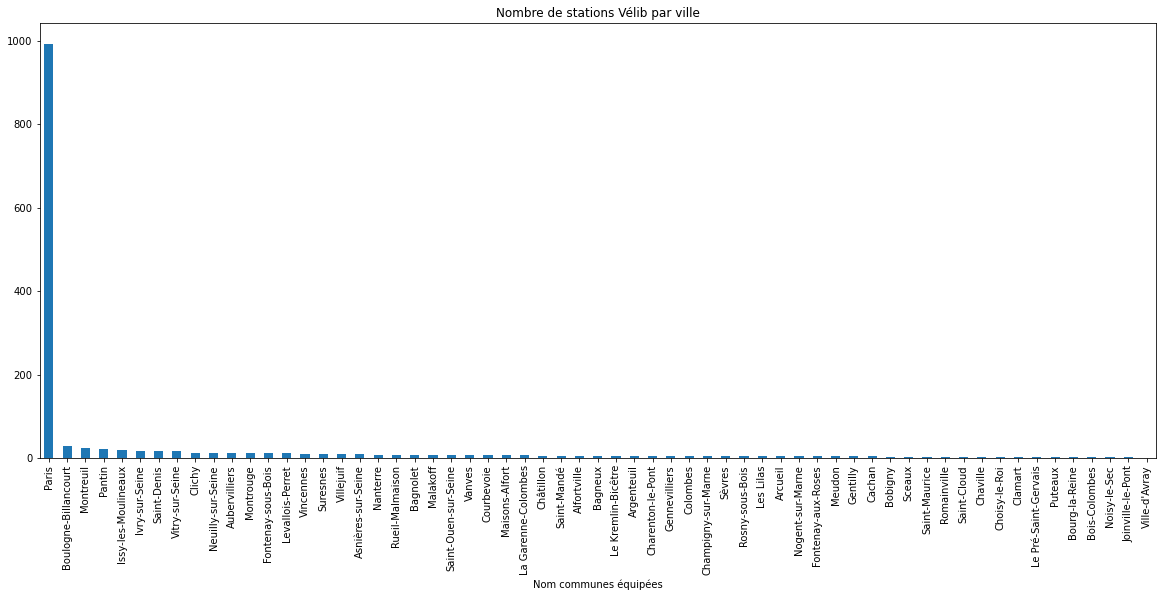

In [7]:
nbParVille = velib.groupby('Nom communes équipées').count().sort_values(by='Identifiant station',ascending=False)
nbParVille['Identifiant station'].plot(kind='bar',figsize=(20,8),title='Nombre de stations Vélib par ville')

On remarque clairement que le nombre de stations Vélib à Paris est très largement supérieur à celle des autres villes.

In [8]:
nbParVilleSParis = velib[velib['Nom communes équipées']!='Paris'].count()
nbParVilleSParis['Nom station']

448

In [9]:
nbParVilleSParis = velib[velib['Nom communes équipées']=='Paris'].count()
nbParVilleSParis['Nom station']

993

Il y a 448 stations hors de Paris contre dans 993 Paris, soit 45% de stations en plus dans la capitale.

<AxesSubplot:title={'center':'Nombre de vélos Vélib par ville'}, xlabel='Nom communes équipées'>

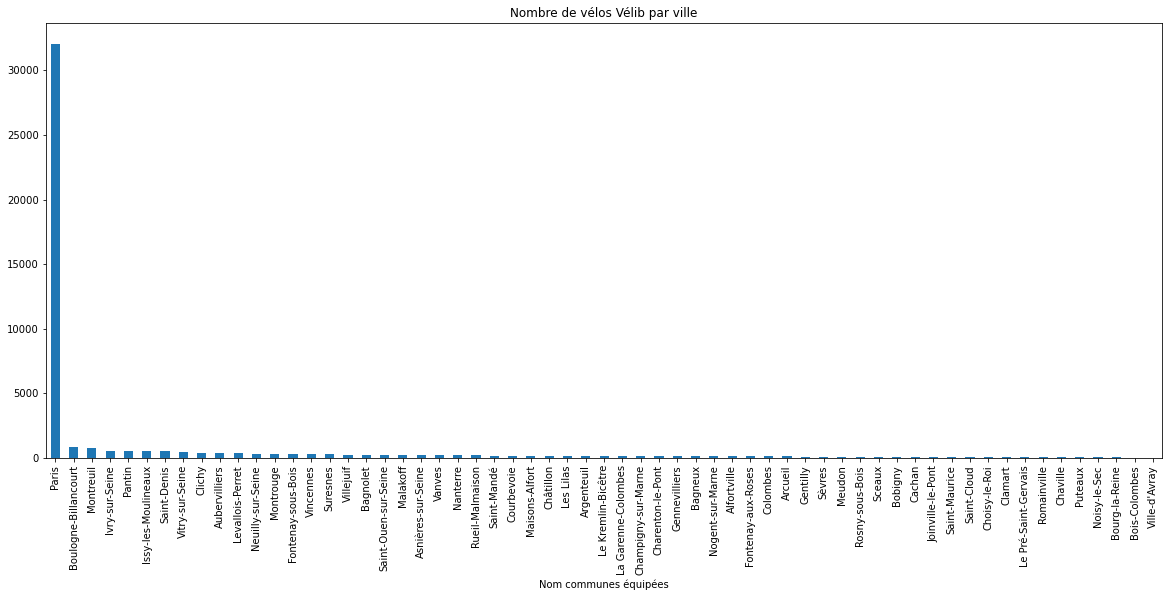

In [10]:
sumParVille = velib.groupby('Nom communes équipées').sum().sort_values(by='Capacité de la station',ascending=False)
sumParVille['Capacité de la station'].plot(kind='bar',figsize=(20,8),title='Nombre de vélos Vélib par ville')

On remarque que logiquement la somme des capacités de Vélib est similaire au nombre de stations, plaçant encore Paris très largement devant.

In [11]:
sumParVilleSParis = velib[velib['Nom communes équipées']!='Paris'].sum()
sumParVilleSParis['Capacité de la station']

13004

In [12]:
sumParVilleSParis = velib[velib['Nom communes équipées']=='Paris'].sum()
sumParVilleSParis['Capacité de la station']

32048

Il y 13004 vélos hors de Paris contre 32048 dans Paris, soit 40% de vélos en plus dans la capitale. C'est en chiffre logique et proche des 45% de l'analyse précédente.

<AxesSubplot:title={'center':'Nombre de vélos Vélib par ville'}, xlabel='Nom communes équipées'>

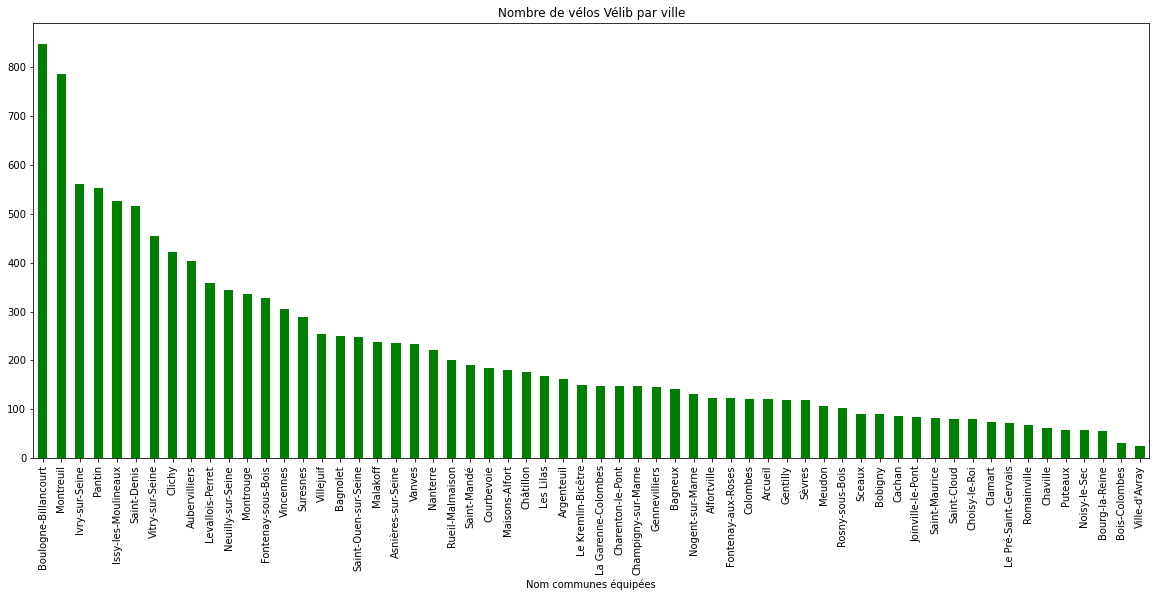

In [13]:
sumSansParis = velib[velib['Nom communes équipées']!='Paris'].groupby('Nom communes équipées').sum().sort_values(by='Capacité de la station',ascending=False)
sumSansParis['Capacité de la station'].plot(kind='bar',color='green',figsize=(20,8),title='Nombre de vélos Vélib par ville')

Si on regarde les même données mais en enlevant Paris, on remarque que les villes avec les plus de Velib sont Boulogne-Billancourt puis Montreuil (cad les grandes banlieues proches de la capitale)

In [14]:
meanSParis = velib[velib['Nom communes équipées']!='Paris']
meanParis = velib[velib['Nom communes équipées']=='Paris']
print("Moyennes hors de Paris : ")
print(f"Moyenne capacité station = {meanSParis['Capacité de la station'].mean()}")
print(f"Moyenne bornettes libres = {meanSParis['Nombre bornettes libres'].mean()}")
print(f"Moyenne Vélib dispos = {meanSParis['Nombre total vélos disponibles'].mean()}")
print("Moyennes dans Paris : ")
print(f"Moyenne capacité station = {meanParis['Capacité de la station'].mean()}")
print(f"Moyenne bornettes libres = {meanParis['Nombre bornettes libres'].mean()}")
print(f"Moyenne Vélib dispos = {meanParis['Nombre total vélos disponibles'].mean()}")

Moyennes hors de Paris : 
Moyenne capacité station = 29.026785714285715
Moyenne bornettes libres = 19.408482142857142
Moyenne Vélib dispos = 8.488839285714286
Moyennes dans Paris : 
Moyenne capacité station = 32.273917421953676
Moyenne bornettes libres = 23.073514602215507
Moyenne Vélib dispos = 7.847935548841893


On remarque que les moyennes sont plutôt similaires entre les villes hors de Paris et Paris. Cela confirme le fait que les stations sont généralement de même taille, mais que le nombre de stations bien plus important dans la capitale fait envoler le nombre de Vélib.

## Analyse fonctionnement des stations

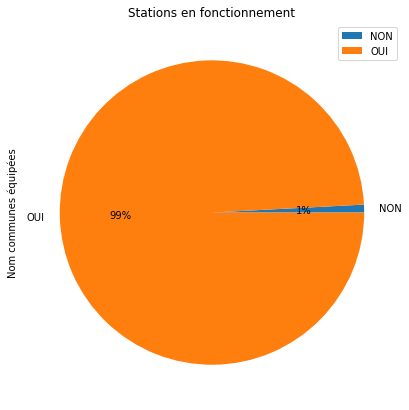

In [15]:
fonctionnement = velib.groupby('Station en fonctionnement').count().plot(kind='pie',
                                                                         y='Nom communes équipées',
                                                                         figsize=(15,7),
                                                                         title='Stations en fonctionnement',
                                                                         autopct='%1.0f%%')

Ce pie chart est très positif car il montre que 99% des stations de Vélib en Ile-De-France sont fonctionnelles.

<AxesSubplot:title={'center':'Etat station'}, ylabel='Station'>

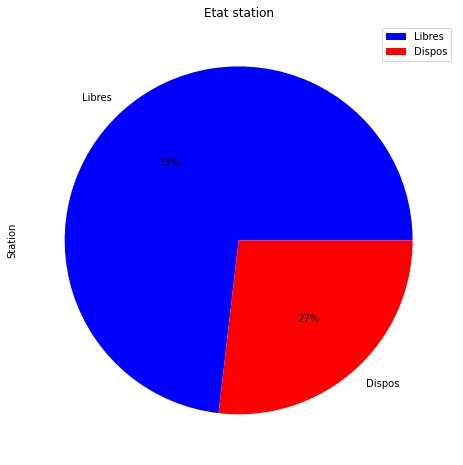

In [16]:
l = velib['Nombre bornettes libres'].sum()
d = velib['Nombre total vélos disponibles'].sum()
util = pd.DataFrame({'Station': [l,d]},index=['Libres','Dispos'])
util.plot(kind='pie',y='Station',figsize=(15,8),colors = ['blue','red'],title='Etat station',autopct='%1.0f%%')

Ce pie chart nous montre la répartition d'une station moyenne. On y trouve environ 75% de places libres et 25% de vélos disponibles. Il y a donc une volonté de la mairie de faciliter le déplacement des usagers en privilégiant la mise en place de station facilement utilisable comme station d'arrêt, au lieu d'y mettre plus de vélos.

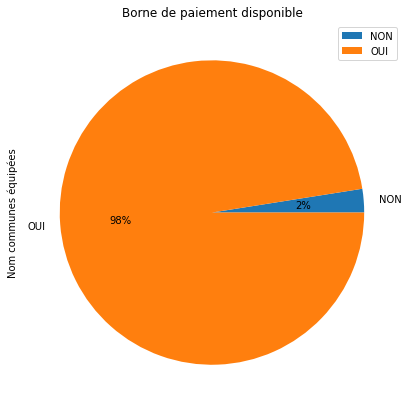

In [17]:
paiement = velib.groupby('Borne de paiement disponible').count().plot(kind='pie',
                                                                         y='Nom communes équipées',
                                                                         figsize=(15,7),
                                                                         title='Borne de paiement disponible',
                                                                         autopct='%1.0f%%')

Plus de 98% des stations ont une borne de paiement, ce qui a également été bien mis en place pour pemettre à tout le monde d'utiliser ces stations, même sans abonnement.

<AxesSubplot:title={'center':'Types de vélo'}, ylabel='Types de vélo'>

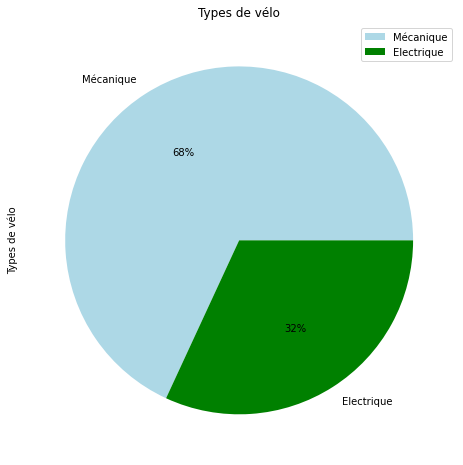

In [18]:
m = velib['Vélos mécaniques disponibles'].sum()
e = velib['Vélos électriques disponibles'].sum()
typeV = pd.DataFrame({'Types de vélo': [m,e]},index=['Mécanique','Electrique'])
typeV.plot(kind='pie',y='Types de vélo',figsize=(15,8),colors = ['lightblue', 'green'],title='Types de vélo',autopct='%1.0f%%')

Ce dernier pie chart nous présente la proportion du type de vélo en Ile-de-France. On voit qu'envion 70% des vélos sont mécaniques, ce qui est logique car ceux électriques sont plus chers. 

## Analyse selon le jour même

Malheureusement nous n'avons pas accès à cette même database à une date passée pour comparer avec les années précédentes. Nous allons donc comparer la databse du 12/10/2022 à 18H30, avec la database disponible la plus récente lors du lancement du Notebook.
A noter que les données étant en directes, l'analyse écrite des données pourrait ne pas être pertinante selon les valeurs relevés en direct.

In [19]:
velibNow = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/0845c838-6f18-40c3-936f-da204107759a",sep=";")
velibNow = velibNow.dropna(how='all',axis=1)
velibNow = velibNow.drop(columns=['coordonnees_geo','duedate'], axis=1)

velibNow.rename(columns = {'is_installed':'Station en fonctionnement',
                           'capacity':'Capacité de la station',
                           'mechanical':'Vélos mécaniques disponibles',
                           'ebike':'Vélos électriques disponibles',
                           'numdocksavailable':'Nombre bornettes libres',
                           'numbikesavailable':'Nombre total vélos disponibles'},inplace=True)
velibNow.head()

,stationcode,name,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,is_renting,is_returning,nom_arrondissement_communes
0,31104,Mairie de Rosny-sous-Bois,OUI,30,3,25,7,18,OUI,OUI,Rosny-sous-Bois
1,16107,Benjamin Godard - Victor Hugo,OUI,35,34,0,0,0,OUI,OUI,Paris
2,14014,Jourdan - Stade Charléty,OUI,60,30,30,19,11,OUI,OUI,Paris
3,11104,Charonne - Robert et Sonia Delauney,OUI,20,9,11,5,6,OUI,OUI,Paris
4,10013,Alibert - Jemmapes,OUI,60,52,7,4,3,OUI,OUI,Paris


Creation et nettoyage des données relevées en direct 

<AxesSubplot:title={'center':'Types de vélos dispo en direct'}, ylabel='Types de vélo en direct'>

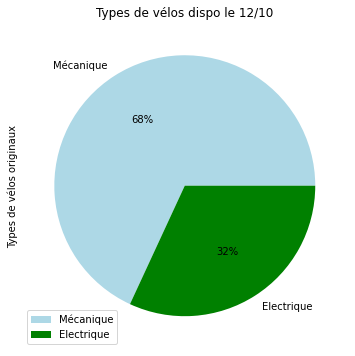

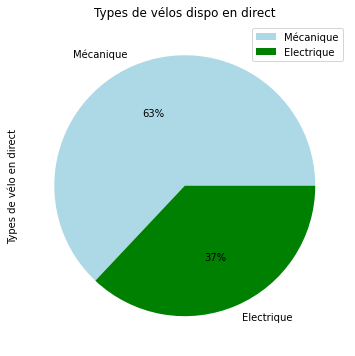

In [20]:
m = velib['Vélos mécaniques disponibles'].sum()
e = velib['Vélos électriques disponibles'].sum()
typeV = pd.DataFrame({'Types de vélos originaux': [m,e]},index=['Mécanique','Electrique'])
typeV.plot(kind='pie',y='Types de vélos originaux',figsize=(10,6),colors = ['lightblue', 'green'],title='Types de vélos dispo le 12/10',autopct='%1.0f%%')

m2 = velibNow['Vélos mécaniques disponibles'].sum()
e2 = velibNow['Vélos électriques disponibles'].sum()
typeV2 = pd.DataFrame({'Types de vélo en direct': [m2,e2]},index=['Mécanique','Electrique'])
typeV2.plot(kind='pie',y='Types de vélo en direct',figsize=(10,6),colors = ['lightblue', 'green'],title='Types de vélos dispo en direct',autopct='%1.0f%%')

Au moment de l'analyse des données les plus récentes, on remarque quand même une différence importante entre ces deux pie chart avec plus de 10% de vélos électriques disponibles en plus. 

In [21]:
nbA1 = velib['Nombre bornettes libres'].sum()
nbD1 = velibNow['Nombre bornettes libres'].sum()
nbA2 = velib['Nombre total vélos disponibles'].sum()
nbD2 = velibNow['Nombre total vélos disponibles'].sum()

print(f"Nombre de bornettes libres le 12/10 : {nbA1}")
print(f"Nombre de bornettes libres en direct : {nbD1}")
print(f"Nombre total vélos disponibles le 12/10 : {nbA1}")
print(f"Nombre total vélos disponibles en direct : {nbD2}")

Nombre de bornettes libres le 12/10 : 31607
Nombre de bornettes libres en direct : 28385
Nombre total vélos disponibles le 12/10 : 31607
Nombre total vélos disponibles en direct : 15021


#### Creation de quelques heatmap en comparaisons temporelles

In [22]:
c12= velib['Capacité de la station'].sum()
nb12= velib['Nombre bornettes libres'].sum()
d12= velib['Nombre total vélos disponibles'].sum()
m12 = velib['Vélos mécaniques disponibles'].sum()
e12 = velib['Vélos électriques disponibles'].sum()

cN= velibNow['Capacité de la station'].sum()
nbN= velibNow['Nombre bornettes libres'].sum()
dN= velibNow['Nombre total vélos disponibles'].sum()
mN = velibNow['Vélos mécaniques disponibles'].sum()
eN = velibNow['Vélos électriques disponibles'].sum()

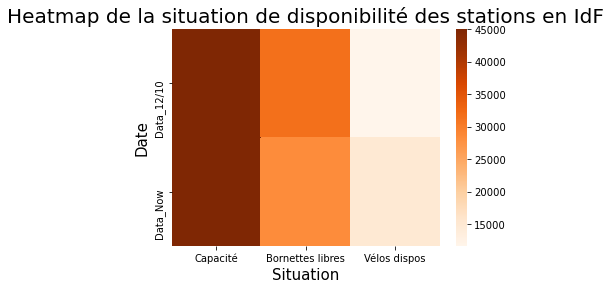

In [23]:
joinNb = pd.DataFrame({'Capacité':[c12,cN],
                     'Bornettes libres' : [nb12,nbN],
                     'Vélos dispos':[d12,dN]},
                    index=['Data_12/10','Data_Now'])
ax = sns.heatmap(joinNb,cmap='Oranges')
plt.title('Heatmap de la situation de disponibilité des stations en IdF', fontsize = (20)) 
plt.xlabel('Situation', fontsize = 15) 
plt.ylabel('Date', fontsize = 15) 
plt.rcParams["figure.figsize"] = (15,4)

plt.show()

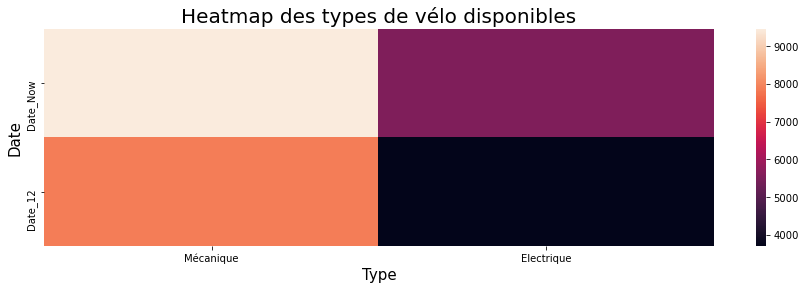

In [24]:
joinType = pd.DataFrame({'Mécanique':[m12,mN],'Electrique':[e12,eN]},index=['Date_12','Date_Now'])
joinType = joinType.sort_values(by='Mécanique',ascending=False)
ax = sns.heatmap(joinType)
plt.title('Heatmap des types de vélo disponibles', fontsize = (20)) 
plt.xlabel('Type', fontsize = 15) 
plt.ylabel('Date', fontsize = 15) 
plt.rcParams["figure.figsize"] = (15,4)

plt.show()

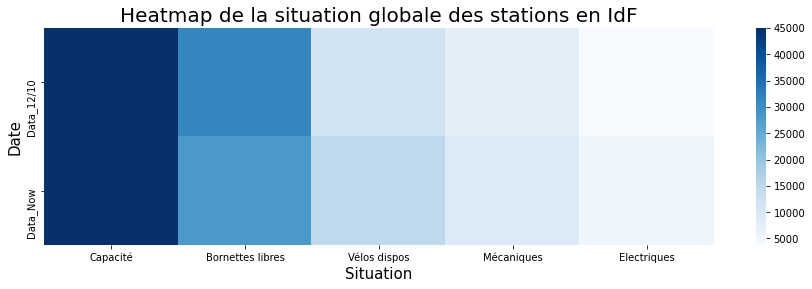

In [25]:
join = pd.DataFrame({'Capacité':[c12,cN],
                     'Bornettes libres' : [nb12,nbN],
                     'Vélos dispos':[d12,dN],
                     'Mécaniques': [m12,mN],
                     'Electriques':[e12,eN]},
                    index=['Data_12/10','Data_Now'])

ax =sns.heatmap(join,cmap='Blues')
plt.title('Heatmap de la situation globale des stations en IdF', fontsize = (20)) 
plt.xlabel('Situation', fontsize = 15) 
plt.ylabel('Date', fontsize = 15) 
plt.rcParams["figure.figsize"] = (15,4)

plt.show()

### Analyse dans Paris

##### On converti les données de Identifiant Station Object en string afin d'avoir les arrondissements à Paris
(Nous allons ignorer les résultats hors de Paris pour cette colonne)

In [26]:
def arr(x):
    if len(str(x))==4:
        return int(str(x)[0:1])
    else :
        return int(str(x)[0:2])

In [27]:
velib['Arrondissement']=velib['Identifiant station'].map(arr)
velib

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées,Arrondissement
0,31104,Mairie de Rosny-sous-Bois,OUI,30,18,9,4,5,OUI,OUI,Rosny-sous-Bois,31
1,16107,Benjamin Godard - Victor Hugo,OUI,35,33,0,0,0,OUI,OUI,Paris,16
2,11104,Charonne - Robert et Sonia Delauney,OUI,20,16,4,1,3,OUI,OUI,Paris,11
3,9020,Toudouze - Clauzel,OUI,21,14,7,3,4,OUI,OUI,Paris,9
4,14111,Cassini - Denfert-Rochereau,OUI,25,20,4,0,4,OUI,OUI,Paris,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,34005,Adrien Lesesne - Docteur Bauer,OUI,30,0,25,11,14,OUI,OUI,Saint-Ouen-sur-Seine,34
1437,10026,Gare de l'Est - Chateau Landon,OUI,59,41,14,6,8,OUI,OUI,Paris,10
1438,18023,Ordener - Poissonniers,OUI,35,30,5,1,4,OUI,OUI,Paris,18
1439,18026,Ruisseau - Ordener,OUI,35,15,18,9,9,OUI,OUI,Paris,18


Création d'une nouvelle colonne arrondissement pour les futures analyses.

<AxesSubplot:title={'center':'Nombre de station par arrondissement'}, xlabel='Arrondissement', ylabel='Nombre stations'>

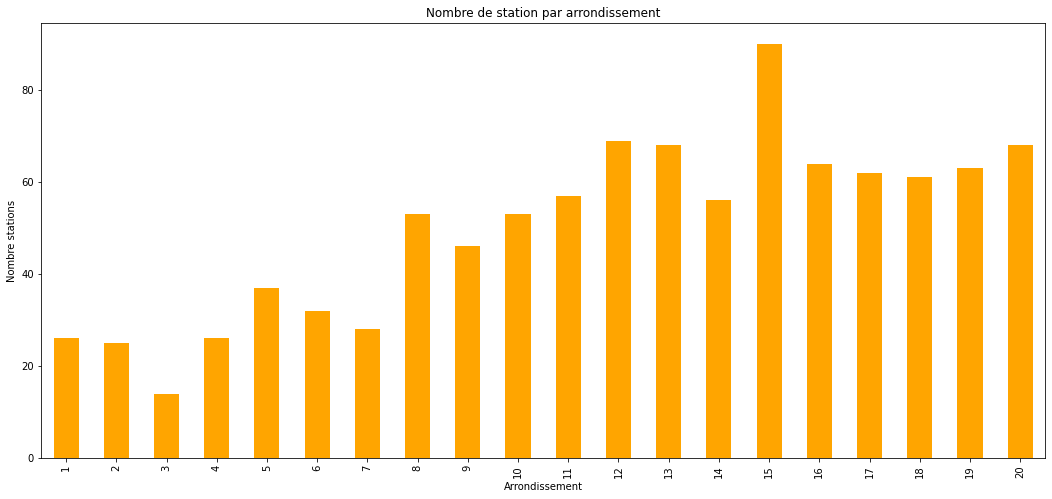

In [28]:
stationP = velib[velib['Arrondissement']<=20].groupby('Arrondissement').count()
stationP['Nom station'].plot(kind='bar',figsize=(18,8),color='orange',ylabel='Nombre stations',title='Nombre de station par arrondissement')

<AxesSubplot:title={'center':'Nombre de vélos par arrondissement'}, xlabel='Arrondissement', ylabel='Nombre vélos'>

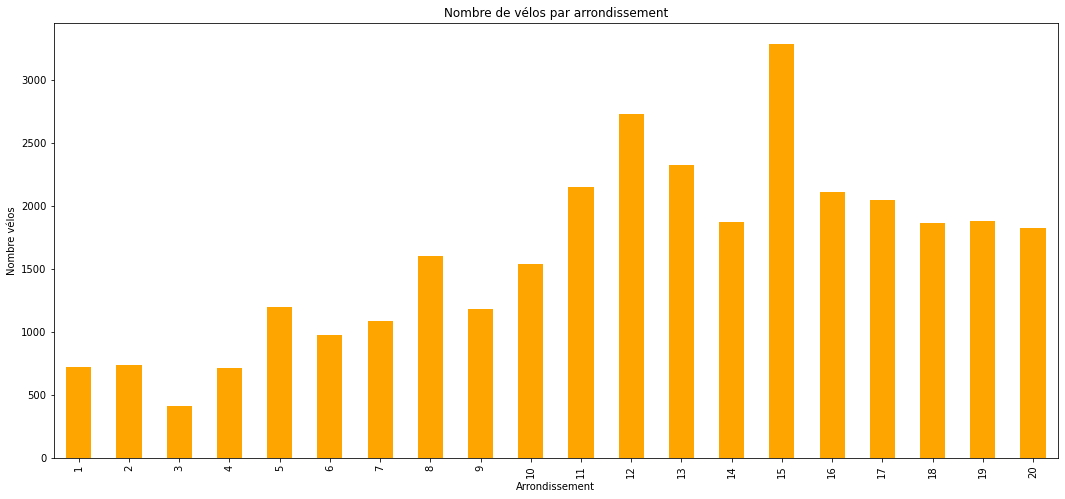

In [29]:
nbP = velib[velib['Arrondissement']<=20].groupby('Arrondissement').sum()
nbP['Capacité de la station'].plot(kind='bar',figsize=(18,8),color='orange',ylabel='Nombre vélos',title='Nombre de vélos par arrondissement')

On remarque que le 15ème arrondissement est celui avec le plus de stations ainsi que de vélos. De plus, de façon générale le graph du nombre de stations est similaire à celui du nombre de vélos.

# TROISIEME PARTIE

Dans la partie 2, nous avons remarqué que la plupart des velibs étaient localisés à Paris.

Ainsi pour notre problématique nous allons nous concentrer sur les vélibs à Paris.

## Problématique : La répartition des stations vélib sur Paris est-elle uniforme, ou est-elle influencée par d'autres facteurs ? 

Pour y répondre, nous regarderons par rapport aux pistes cyclables, aux lieux historiques (donc touristique) ainsi qu'à la superficie et au nombre d'habitants par arrondissement.

La database velib que nous avons choisi ne possède pas de colonne arrondissement. Cependant, nous avons remarquer que les premiers numéro d'indentification de la station correspondent à l'arrondissement dans lequel elle est située

nb : quand c'est un arrondissement inférieur à 10, on a que 4 chiffres alors qu'il y en a 5 pour les autres 

In [30]:
velib[(velib['Nom communes équipées']=='Paris')& (velib['Station en fonctionnement']=='OUI')]

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées,Arrondissement
1,16107,Benjamin Godard - Victor Hugo,OUI,35,33,0,0,0,OUI,OUI,Paris,16
2,11104,Charonne - Robert et Sonia Delauney,OUI,20,16,4,1,3,OUI,OUI,Paris,11
3,9020,Toudouze - Clauzel,OUI,21,14,7,3,4,OUI,OUI,Paris,9
4,14111,Cassini - Denfert-Rochereau,OUI,25,20,4,0,4,OUI,OUI,Paris,14
5,12109,Mairie du 12ème,OUI,30,21,7,5,2,OUI,OUI,Paris,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,17127,Porte de Clichy - Place des Nations Unies,OUI,40,1,36,29,7,OUI,OUI,Paris,17
1437,10026,Gare de l'Est - Chateau Landon,OUI,59,41,14,6,8,OUI,OUI,Paris,10
1438,18023,Ordener - Poissonniers,OUI,35,30,5,1,4,OUI,OUI,Paris,18
1439,18026,Ruisseau - Ordener,OUI,35,15,18,9,9,OUI,OUI,Paris,18


In [31]:
velib['Identifiant station'].dtypes

dtype('O')

le type est object donc on le transforme en string pour pouvoir l'utiliser

In [32]:
velib['Identifiant station'].astype('string')

0       31104
1       16107
2       11104
3        9020
4       14111
        ...  
1436    34005
1437    10026
1438    18023
1439    18026
1440     8004
Name: Identifiant station, Length: 1441, dtype: string

In [33]:
def arr(x):
    if len(str(x))==4:
        return int(str(x)[0:1])
    else :
        return int(str(x)[0:2])

In [34]:
velib['Identifiant station']=velib['Identifiant station'].map(arr) # on remplace la col identifiant station avec juste l'arrondissement
velib.rename(columns={'Identifiant station':'arrondissement'}, inplace=True) # on renomme pour plus de clareté
velib

,arrondissement,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées,Arrondissement
0,31,Mairie de Rosny-sous-Bois,OUI,30,18,9,4,5,OUI,OUI,Rosny-sous-Bois,31
1,16,Benjamin Godard - Victor Hugo,OUI,35,33,0,0,0,OUI,OUI,Paris,16
2,11,Charonne - Robert et Sonia Delauney,OUI,20,16,4,1,3,OUI,OUI,Paris,11
3,9,Toudouze - Clauzel,OUI,21,14,7,3,4,OUI,OUI,Paris,9
4,14,Cassini - Denfert-Rochereau,OUI,25,20,4,0,4,OUI,OUI,Paris,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,34,Adrien Lesesne - Docteur Bauer,OUI,30,0,25,11,14,OUI,OUI,Saint-Ouen-sur-Seine,34
1437,10,Gare de l'Est - Chateau Landon,OUI,59,41,14,6,8,OUI,OUI,Paris,10
1438,18,Ordener - Poissonniers,OUI,35,30,5,1,4,OUI,OUI,Paris,18
1439,18,Ruisseau - Ordener,OUI,35,15,18,9,9,OUI,OUI,Paris,18


In [35]:
velib=velib[(velib['Nom communes équipées']=='Paris')] # on prend que les lignes correspondant aux stations à paris
velib

,arrondissement,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Nom communes équipées,Arrondissement
1,16,Benjamin Godard - Victor Hugo,OUI,35,33,0,0,0,OUI,OUI,Paris,16
2,11,Charonne - Robert et Sonia Delauney,OUI,20,16,4,1,3,OUI,OUI,Paris,11
3,9,Toudouze - Clauzel,OUI,21,14,7,3,4,OUI,OUI,Paris,9
4,14,Cassini - Denfert-Rochereau,OUI,25,20,4,0,4,OUI,OUI,Paris,14
5,12,Mairie du 12ème,OUI,30,21,7,5,2,OUI,OUI,Paris,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,17,Porte de Clichy - Place des Nations Unies,OUI,40,1,36,29,7,OUI,OUI,Paris,17
1437,10,Gare de l'Est - Chateau Landon,OUI,59,41,14,6,8,OUI,OUI,Paris,10
1438,18,Ordener - Poissonniers,OUI,35,30,5,1,4,OUI,OUI,Paris,18
1439,18,Ruisseau - Ordener,OUI,35,15,18,9,9,OUI,OUI,Paris,18


### Referentiel Archéologiques

In [36]:
hist = pd.read_csv("referentiel-archeologique-de-paris.csv", sep=";")
hist = hist.loc [:, hist.columns == 'Code postal'] # on prend que la col code postale
hist = hist.dropna(how='any',axis=0) # on supp les lignes où y'a une case sans valeur
hist

,Code postal
0,75005
1,75005
2,75006
3,75004
4,75010
...,...
1806,75005
1807,75012
1808,75013
1809,75005


Utilisation d'une nouvelle database, sur les lieux archéologiques dans Paris, que nous allons compter par arrondissement.

In [37]:
def arr2(x):
    if str(x)[3]==0:
        return int(str(x)[4:5])
    else :
        return int(str(x)[3:5])

In [38]:
hist['Code postal']=hist['Code postal'].map(arr2) 

In [39]:
hist['nb lieux hist']=1
a = hist.groupby('Code postal').sum().sort_values(by='Code postal', ascending = True)
a

,nb lieux hist
Code postal,
1,135
2,25
3,73
4,260
5,664
6,234
7,32
8,16
9,8


In [40]:
velib['nb station']=1
b = velib.groupby('arrondissement').sum().sort_values(by='arrondissement')
b = b.loc [:, b.columns == 'nb station']
b


<ipython-input-40-b6347c4479e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  velib['nb station']=1


,nb station
arrondissement,
1,26
2,25
3,14
4,26
5,37
6,32
7,28
8,53
9,46


In [41]:
df = pd.concat([a,b],axis=1)
df

,nb lieux hist,nb station
1,135,26
2,25,25
3,73,14
4,260,26
5,664,37
6,234,32
7,32,28
8,16,53
9,8,46
10,17,53


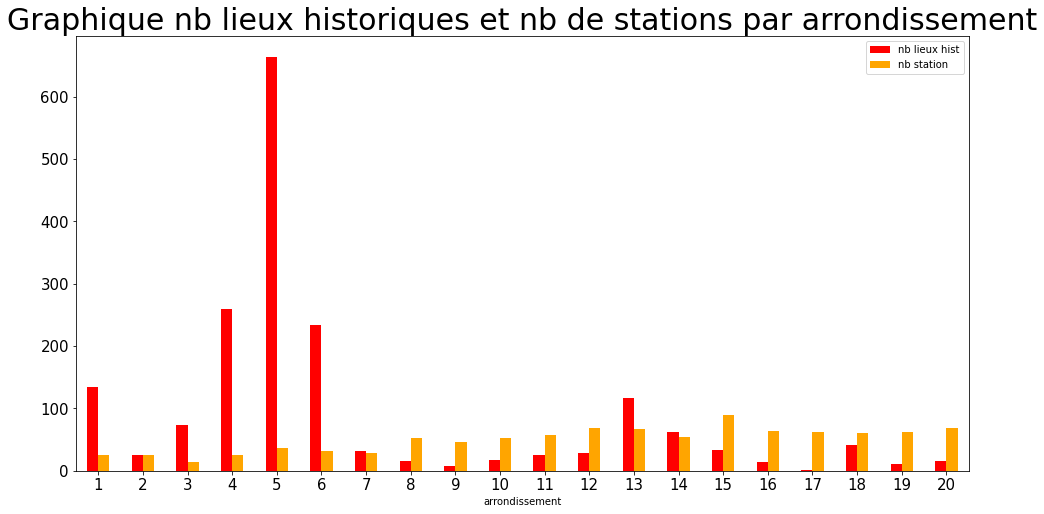

In [42]:
ax = df.plot.bar(rot=0, color=['red','orange'], fontsize=15,xlabel='arrondissement',title="Graphique nb lieux historiques et nb de stations par arrondissement", figsize=(16,8))
ax.title.set_size(30)

On voit sur ce graphique que le nombre de lieux historiques (donc touristiques) et le nombre de stations de vélib ne sont pas très corrélés. 
En effet, le 15ème arrondissement possède 2 fois plus de stations vélib que le 5ème arrondissement alors qu'il y a 100 fois moins de lieux historiques. 
Cela semble logique car les lieux historiques sont souvent touristiques et les touristes ne sont pas ceux qui se déplacent en vélib. 


De ce fait, nous allons nous interresser aux habitants de Paris. Pour cela, nous allons étudier la superficie de chaque arrondissement et le nb d'habitant qu'ils ont. 
Nous n'avons pas pu trouvé sur le lien de database contenant ses informations, nous les avons créer.

### Superficie par arrondissement

In [43]:
superficie = pd.read_csv("superficie.csv", sep=";") 
superficie

,arrondissement,hectare,nb habitants
0,1,183,15917
1,2,99,21595
2,3,117,34025
3,4,160,29131
4,5,254,58227
5,6,215,40303
6,7,409,48888
7,8,288,35655
8,9,218,60026
9,10,289,86472


In [44]:
# on met tout en pourcentage
suptotale = superficie['hectare'].sum()
superficie['hectare']=superficie['hectare']*100/suptotale
superficie['hectare']=superficie['hectare'].round(2)
habtotale = superficie['nb habitants'].sum()
superficie['nb habitants'] = superficie['nb habitants']*100/habtotale
superficie['nb habitants']=superficie['nb habitants'].round(2)
superficie

bb=b.reset_index()
bb
fusion = pd.merge(bb, superficie, how="right", left_on="arrondissement", right_on="arrondissement")
fusion


,arrondissement,nb station,hectare,nb habitants
0,1,26,2.13,0.74
1,2,25,1.15,1.00
2,3,14,1.36,1.57
3,4,26,1.86,1.35
4,5,37,2.95,2.69
5,6,32,2.50,1.86
6,7,28,4.76,2.26
7,8,53,3.35,1.65
8,9,46,2.54,2.77
9,10,53,3.36,3.99


In [45]:
# on met les pourcentages pour la répartition des stations aussi
stationtotale = fusion['nb station'].sum()
fusion['nb station']=fusion['nb station']*100/stationtotale
fusion['nb station']=fusion['nb station'].round(2)
fusion

,arrondissement,nb station,hectare,nb habitants
0,1,2.62,2.13,0.74
1,2,2.52,1.15,1.00
2,3,1.41,1.36,1.57
3,4,2.62,1.86,1.35
4,5,3.73,2.95,2.69
5,6,3.22,2.50,1.86
6,7,2.82,4.76,2.26
7,8,5.34,3.35,1.65
8,9,4.63,2.54,2.77
9,10,5.34,3.36,3.99


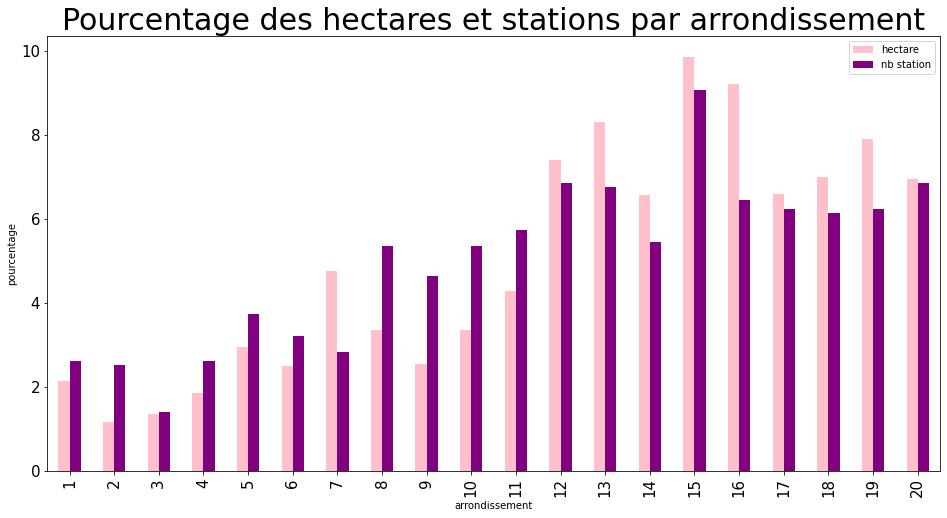

In [46]:
axes = fusion.plot(x='arrondissement', y=['hectare','nb station'], kind="bar", color=['pink','purple'], ylabel='pourcentage', title='Pourcentage des hectares et stations par arrondissement', fontsize = 15, figsize=(16,8))
axes.title.set_size(30)

On remarque que les les 2 facteurs (hectare/nb station) sont assez corrélés car les barres sont assez proches pour chaque arrondissement.


Cependant, nous allons essayer de voir si une corrélation avec le nb d'habitant ne serait pas plus intéressante.

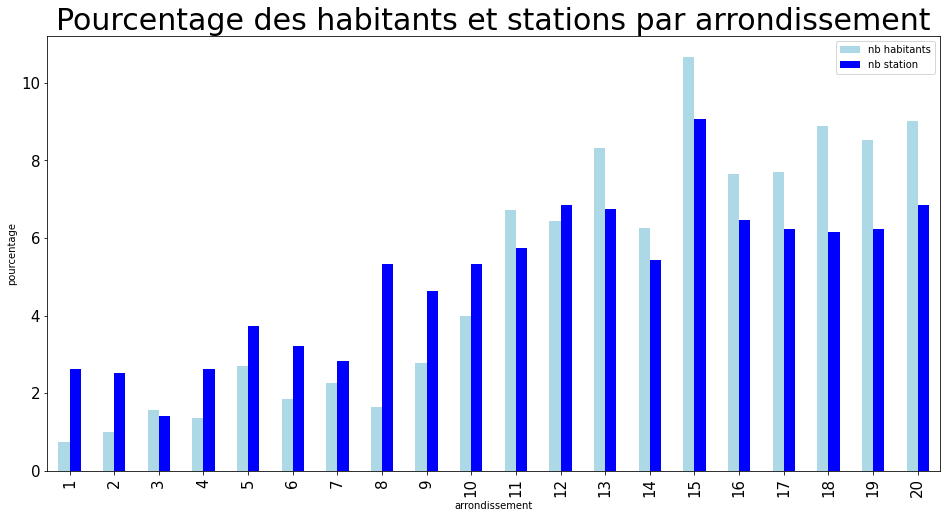

In [47]:
axes = fusion.plot(x='arrondissement', y=['nb habitants','nb station'], kind="bar", color=['lightblue','blue'], ylabel='pourcentage', title='Pourcentage des habitants et stations par arrondissement', fontsize=15,figsize=(16,8))
axes.title.set_size(30)

On voit que la corrélation entre stations et habitants semble être équivalente à celle avec la superficie. Cela semble logique vu que les arrondissements les plus grands sont les plus peuplés. C'est donc normal qu'il y ait plus de stations.

Intéressons nous maintenant aux pistes cyclables de Paris

In [48]:
piste = pd.read_csv("reseau-cyclable.csv", sep=";") # on prend celui là car il y a les superficie des différents secteurs de Paris
piste

,Typologie,Aménagement bidirectionnel,Régime de vitesse,Sens vélo,Voie,Arrondissement,Bois,Longueur du tronçon en m,Longueur du tronçon en km,Position aménagement,Circulation générale interdite,Piste,Couloir bus,Continuité cyclable,Réseau cyclable,Date de livraison,geo_shape,geo_point_2d
0,Pistes cyclables,Non,Voie 50,Sens de circulation générale,BOULEVARD DIDEROT,12.0,Non,147.103105,0.147103,NaN,NaN,Niveau trottoir,NaN,NaN,NaN,NaN,"{""coordinates"": [[2.3837156568728877, 48.84708...","48.846974680459006,2.3827300529595967"
1,Autres itinéraires cyclables (ex : Aires piéto...,Non,Zone 30,Contresens,RUE DU NIGER,12.0,Non,77.254187,0.077254,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31,"{""coordinates"": [[2.4098678042115256, 48.84373...","48.84380083071695,2.4093537226155552"
2,Bandes cyclables,Non,Zone 30,Contresens,RUE DURIS,20.0,Non,88.594788,0.088595,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31,"{""coordinates"": [[2.3874439737312656, 48.86589...","48.86627606103627,2.387269879382407"
3,Autres itinéraires cyclables (ex : Aires piéto...,Oui,Aire piétonne,NaN,PASSAGE MONPLAISIR,20.0,Non,94.685925,0.094686,NaN,Oui,NaN,NaN,NaN,NaN,NaN,"{""coordinates"": [[2.3861312277681836, 48.86579...","48.865589282399746,2.385579850470403"
4,Bandes cyclables,Non,Zone 30,Contresens,RUE ORFILA,20.0,Non,62.025823,0.062026,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-09,"{""coordinates"": [[2.4002717410359686, 48.86808...","48.86816828378828,2.4006757563308194"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,Autres itinéraires cyclables (ex : Aires piéto...,Non,Zone 30,Contresens,NaN,15.0,Non,58.422806,0.058423,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,"{""coordinates"": [[2.294326997862136, 48.834142...","48.834007449210645,2.2946685509979576"
12251,Pistes cyclables,Oui,Voie 50,Contresens,Place des Insurgés de Varsovie,15.0,NaN,16.331214,0.016331,NaN,NaN,Niveau chaussée,NaN,Traversée de carrefour,NaN,2020-04-30,"{""coordinates"": [[2.2927715027218585, 48.82706...","48.82713808718502,2.292806327090202"
12252,Bandes cyclables,Oui,Voie 30,Contresens,RUE LOUIS LUMIERE,20.0,Non,22.810287,0.022810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"": [[2.410805209016714, 48.863559...","48.86345889534651,2.4108319523003297"
12253,Pistes cyclables,Non,Voie 50,Sens de circulation générale,BOULEVARD JOURDAN,14.0,Non,10.765628,0.010766,NaN,NaN,NaN,NaN,Traversée de carrefour,NaN,2006-12-31,"{""coordinates"": [[2.3341982215404253, 48.82116...","48.82114707081777,2.334268020048004"


In [49]:
piste=piste.dropna(subset=['Arrondissement']) # supp les lignes où y'a pas l'arrondissement
piste

,Typologie,Aménagement bidirectionnel,Régime de vitesse,Sens vélo,Voie,Arrondissement,Bois,Longueur du tronçon en m,Longueur du tronçon en km,Position aménagement,Circulation générale interdite,Piste,Couloir bus,Continuité cyclable,Réseau cyclable,Date de livraison,geo_shape,geo_point_2d
0,Pistes cyclables,Non,Voie 50,Sens de circulation générale,BOULEVARD DIDEROT,12.0,Non,147.103105,0.147103,NaN,NaN,Niveau trottoir,NaN,NaN,NaN,NaN,"{""coordinates"": [[2.3837156568728877, 48.84708...","48.846974680459006,2.3827300529595967"
1,Autres itinéraires cyclables (ex : Aires piéto...,Non,Zone 30,Contresens,RUE DU NIGER,12.0,Non,77.254187,0.077254,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31,"{""coordinates"": [[2.4098678042115256, 48.84373...","48.84380083071695,2.4093537226155552"
2,Bandes cyclables,Non,Zone 30,Contresens,RUE DURIS,20.0,Non,88.594788,0.088595,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31,"{""coordinates"": [[2.3874439737312656, 48.86589...","48.86627606103627,2.387269879382407"
3,Autres itinéraires cyclables (ex : Aires piéto...,Oui,Aire piétonne,NaN,PASSAGE MONPLAISIR,20.0,Non,94.685925,0.094686,NaN,Oui,NaN,NaN,NaN,NaN,NaN,"{""coordinates"": [[2.3861312277681836, 48.86579...","48.865589282399746,2.385579850470403"
4,Bandes cyclables,Non,Zone 30,Contresens,RUE ORFILA,20.0,Non,62.025823,0.062026,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-09,"{""coordinates"": [[2.4002717410359686, 48.86808...","48.86816828378828,2.4006757563308194"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,Autres itinéraires cyclables (ex : Aires piéto...,Non,Zone 30,Contresens,NaN,15.0,Non,58.422806,0.058423,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,"{""coordinates"": [[2.294326997862136, 48.834142...","48.834007449210645,2.2946685509979576"
12251,Pistes cyclables,Oui,Voie 50,Contresens,Place des Insurgés de Varsovie,15.0,NaN,16.331214,0.016331,NaN,NaN,Niveau chaussée,NaN,Traversée de carrefour,NaN,2020-04-30,"{""coordinates"": [[2.2927715027218585, 48.82706...","48.82713808718502,2.292806327090202"
12252,Bandes cyclables,Oui,Voie 30,Contresens,RUE LOUIS LUMIERE,20.0,Non,22.810287,0.022810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"": [[2.410805209016714, 48.863559...","48.86345889534651,2.4108319523003297"
12253,Pistes cyclables,Non,Voie 50,Sens de circulation générale,BOULEVARD JOURDAN,14.0,Non,10.765628,0.010766,NaN,NaN,NaN,NaN,Traversée de carrefour,NaN,2006-12-31,"{""coordinates"": [[2.3341982215404253, 48.82116...","48.82114707081777,2.334268020048004"


In [50]:
piste['Arrondissement'].dtypes

dtype('float64')

In [51]:
piste['Arrondissement']=piste['Arrondissement'].astype(int)

<ipython-input-51-21412373decb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piste['Arrondissement']=piste['Arrondissement'].astype(int)


In [52]:
piste['Arrondissement'].dtypes

dtype('int32')

In [53]:
a = piste.groupby('Arrondissement')
a = a.sum()
a = a.sort_values(by='Arrondissement')
a = a.loc [:, a.columns == 'Longueur du tronçon en km']
a

,Longueur du tronçon en km
Arrondissement,
1,39.729378
2,24.721218
3,16.803117
4,33.884346
5,31.137378
6,28.788478
7,42.783767
8,38.880175
9,28.222356


In [54]:
b

,nb station
arrondissement,
1,26
2,25
3,14
4,26
5,37
6,32
7,28
8,53
9,46


In [55]:
df = pd.concat([a,b],axis=1)
df 

,Longueur du tronçon en km,nb station
1,39.729378,26
2,24.721218,25
3,16.803117,14
4,33.884346,26
5,31.137378,37
6,28.788478,32
7,42.783767,28
8,38.880175,53
9,28.222356,46
10,39.847546,53


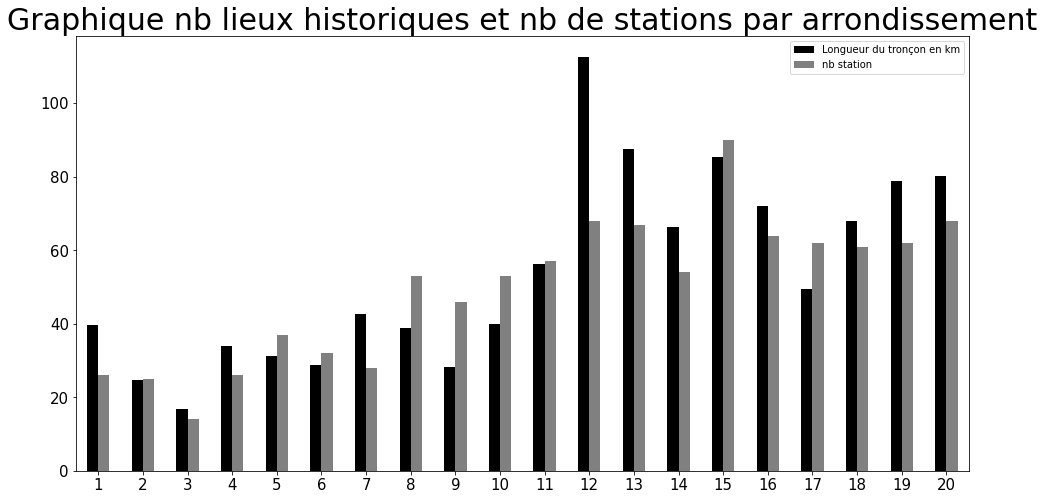

In [56]:
ax2 = df.plot.bar(rot=0, color=['black','grey'],title="Graphique nb lieux historiques et nb de stations par arrondissement", fontsize=15, figsize=(16,8))
ax2.title.set_size(30)

Il semble y avoir une corrélation entre le nb de km de pistes cyclables et le nb de stations de vélib. Mis à part le 12ème arrondissement, les arrondissements avec le plus de stations sont ceux avec le plus de pistes cyclables (15eme, 20eme...) et inversement ceux avec le moins de stations sont ceux qui ont le moins de km de pistes cyclables (3eme, 2eme)

Il y a donc une corrélation entre nb de station et nb de km de pistes cyclables. 
Cependant, on ne peut pas affirmer s'il y a bcp de stations pcq il y a bcp de pistes ou si il y a bcp de pistes parce qu'il y a bcp de stations.

# Conclusion 

La répartition des stations de vélib est en grande partie liés à la superficie (et donc le nb d'habitant) ainsi qu'au nombre de kilomètre de pistes cyclables

Au contraire, les lieux historiques n'ont pas l'air d'avoir une grande influence sur cette répartition

On en conclut que le but de la mairie de paris est de construire le plus de stations velib possible afin que les habitants puissent les utiliser et qu'ils puissent pouvoir aller partout, tout e veillant à avoir des bornes toujours en fonctionnement et avec des bornettes libres afin de faciliter le déplacement des utilisateurs.